In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision import models
import numpy as np
from PIL import Image

# Uso do modelo pré-treinado ResNet50
modelo = models.resnet50(pretrained=True)

path = 'C:/Messy/teti_img/'

# Aplicação de Data augmentation e normalização com uso das configurações
# de média e desvio padrão da ResNet50

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Carrega uma imagem e pré-processa
img = Image.open(path + 'tatsumaki.jpg')
img = transform(img)
x = img.unsqueeze(0)

# Realiza a predição da classe
modelo.eval()
with torch.no_grad():
    preds = modelo(x)
probs = torch.nn.functional.softmax(preds, dim=1)
top_probs, top_idxs = torch.topk(probs, k=3)
print('Predicted:', top_idxs, top_probs)


import urllib.request

url = 'https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt'
urllib.request.urlretrieve(url, 'imagenet_classes.txt')

# Carrega os rótulos das classes da ImageNet
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

# Mostra as predições top-k com os rótulos das predições
for i in range(len(top_idxs[0])):
    print(f"Predicted class: {labels[top_idxs[0][i]]}, Probability: {top_probs[0][i]}")


In [2]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import cifar10
import numpy as np
import random

modelo = ResNet50(weights='imagenet')

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

indices = random.sample(range(len(x_test)), k=10)
x_test = x_test[indices]
y_test = y_test[indices]

for i in range(len(x_test)):
    x = x_test[i]
    x = tf.image.resize(x, (224, 224))  # Redimensiona a imagem para (224, 224)
    x = preprocess_input(x)
    x = np.expand_dims(x, axis=0)
    preds = modelo.predict(x)
    
    id_classe_real = y_test[i][0]
    nome_classe_real = classes[id_classe_real]
    id_classe_pred = np.argmax(preds)
    nome_classe_pred = decode_predictions(preds, top=1)[0][0][1]
    
    print('Classe real:', id_classe_real, nome_classe_real)
    print('Predição:', id_classe_pred, nome_classe_pred)
    print()


1/1 [==============================] - 1s 590ms/step
Classe real: 3 cat
Predição: 152 Japanese_spaniel

1/1 [==============================] - 0s 54ms/step
Classe real: 2 bird
Predição: 135 limpkin

1/1 [==============================] - 0s 53ms/step
Classe real: 1 automobile
Predição: 675 moving_van

1/1 [==============================] - 0s 54ms/step
Classe real: 1 automobile
Predição: 684 ocarina

1/1 [==============================] - 0s 55ms/step
Classe real: 7 horse
Predição: 387 lesser_panda

1/1 [==============================] - 0s 54ms/step
Classe real: 4 deer
Predição: 274 dhole

1/1 [==============================] - 0s 54ms/step
Classe real: 6 frog
Predição: 292 tiger

1/1 [==============================] - 0s 54ms/step
Classe real: 5 dog
Predição: 156 Blenheim_spaniel

1/1 [==============================] - 0s 56ms/step
Classe real: 3 cat
Predição: 277 red_fox

1/1 [==============================] - 0s 54ms/step
Classe real: 5 dog
Predição: 152 Japanese_spaniel



1/1 [==============================] - 0s 53ms/step


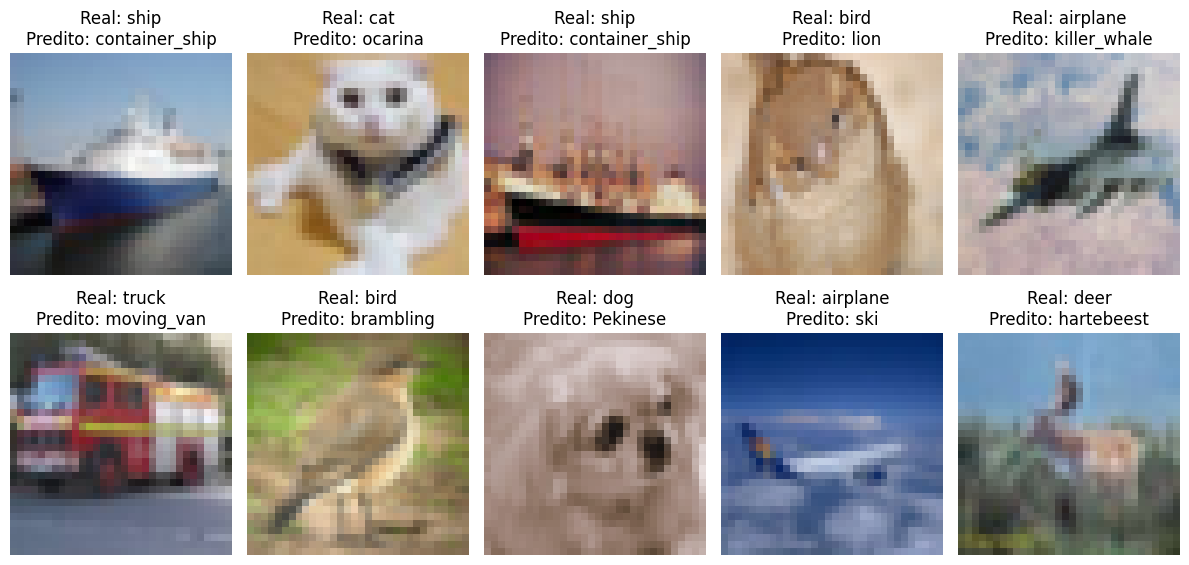

In [3]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import cifar10
import numpy as np
import random
import matplotlib.pyplot as plt

modelo = ResNet50(weights='imagenet')

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

indices = random.sample(range(len(x_test)), k=10)
x_test = x_test[indices]
y_test = y_test[indices]

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))

for i in range(len(x_test)):
    x = x_test[i]
    x = tf.image.resize(x, (224, 224))  # Redimensiona a imagem para (224, 224)
    x = preprocess_input(x)
    x = np.expand_dims(x, axis=0)
    preds = modelo.predict(x)
    
    id_classe_real = y_test[i][0]
    nome_classe_real = classes[id_classe_real]
    id_classe_pred = np.argmax(preds)
    nome_classe_pred = decode_predictions(preds, top=1)[0][0][1]
    
    ax = axes[i // 5, i % 5]
    ax.imshow(x_test[i])
    ax.axis('off')
    ax.set_title(f'Real: {nome_classe_real}\nPredito: {nome_classe_pred}')
    
plt.tight_layout()
plt.show()


ResNet50

In [26]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import cifar10
import numpy as np
import random
import matplotlib.pyplot as plt

modelo = ResNet50(weights='imagenet')

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

indices = random.sample(range(len(x_test)), k=10)
x_test = x_test[indices]
y_test = y_test[indices]

1/1 [==============================] - 0s 57ms/step


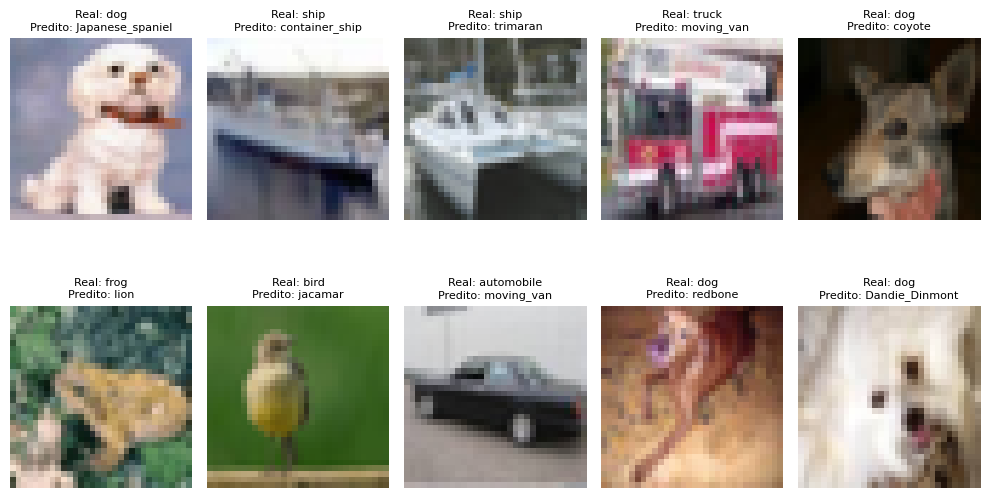

In [28]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))

for i in range(len(x_test)):
    x = x_test[i]
    x = tf.image.resize(x, (224, 224))
    x = preprocess_input(x)
    x = np.expand_dims(x, axis=0)
    preds = modelo.predict(x)

    id_classe_real = y_test[i][0]
    nome_classe_real = classes[id_classe_real]
    id_classe_pred = np.argmax(preds)
    nome_classe_pred = decode_predictions(preds, top=1)[0][0][1]

    ax = axes[i // 5, i % 5]
    ax.imshow(x_test[i])
    ax.axis('off')

    # Adiciona o título na imagem
    ax.set_title(f'Real: {nome_classe_real}\nPredito: {nome_classe_pred}', fontsize=8)

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 55ms/step


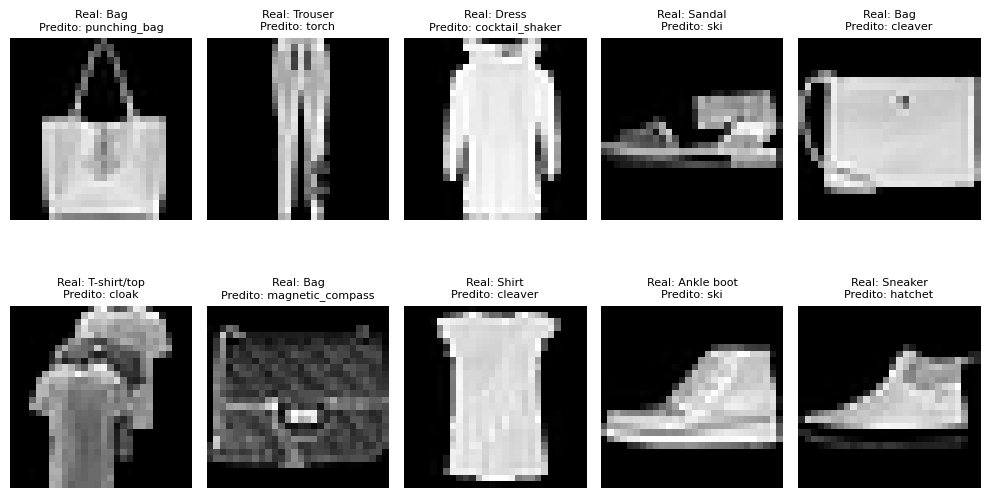

In [30]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import random
import matplotlib.pyplot as plt

modelo = ResNet50(weights='imagenet')

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

indices = random.sample(range(len(x_test)), k=10)
x_test = x_test[indices]
y_test = y_test[indices]

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))

for i in range(len(x_test)):
    x = x_test[i]
    x = tf.expand_dims(x, axis=-1)  # Expand dimensions to (height, width, channels)
    x = tf.image.resize(x, (224, 224))
    x = tf.image.grayscale_to_rgb(x)  # ResNet50 expects RGB images
    x = preprocess_input(x)
    x = np.expand_dims(x, axis=0)
    preds = modelo.predict(x)

    id_classe_real = y_test[i]
    nome_classe_real = classes[id_classe_real]
    id_classe_pred = np.argmax(preds)
    nome_classe_pred = decode_predictions(preds, top=1)[0][0][1]

    ax = axes[i // 5, i % 5]
    ax.imshow(x_test[i], cmap='gray')
    ax.axis('off')

    # Adiciona o título na imagem
    ax.set_title(f'Real: {nome_classe_real}\nPredito: {nome_classe_pred}', fontsize=8)

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 25ms/step


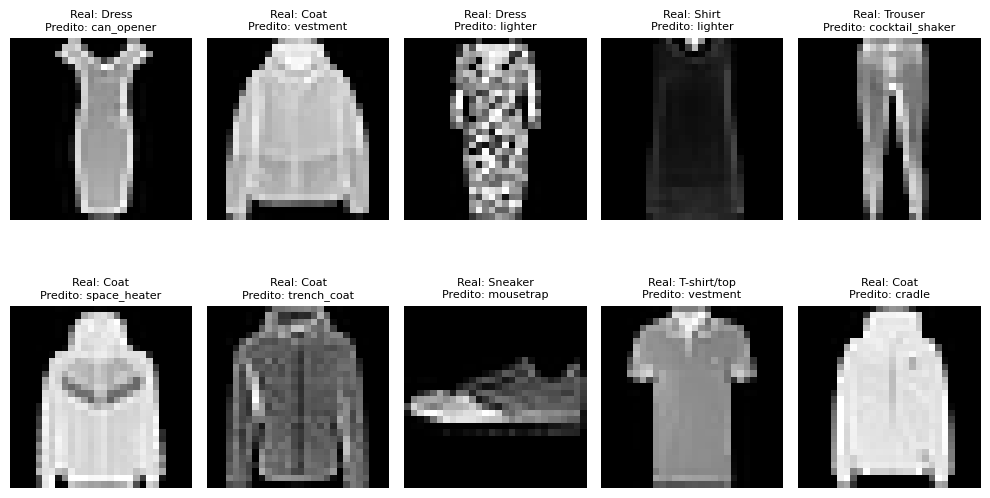

In [32]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import random
import matplotlib.pyplot as plt

modelo = MobileNetV2(weights='imagenet')

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

indices = random.sample(range(len(x_test)), k=10)
x_test = x_test[indices]
y_test = y_test[indices]

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))

for i in range(len(x_test)):
    x = x_test[i]
    x = np.expand_dims(x, axis=-1)  # Expand dimensions to (height, width, channels)
    x = tf.image.resize(x, (224, 224))
    x = tf.image.grayscale_to_rgb(x)  # Convert to RGB
    x = preprocess_input(x)
    x = np.expand_dims(x, axis=0)
    preds = modelo.predict(x)

    id_classe_real = y_test[i]
    nome_classe_real = classes[id_classe_real]
    id_classe_pred = np.argmax(preds)
    nome_classe_pred = decode_predictions(preds, top=1)[0][0][1]

    ax = axes[i // 5, i % 5]
    ax.imshow(x_test[i], cmap='gray')
    ax.axis('off')

    # Add the title to the image
    ax.set_title(f'Real: {nome_classe_real}\nPredito: {nome_classe_pred}', fontsize=8)

plt.tight_layout()
plt.show()
